<div style = "background-color:yellow">
<h2><b>Competição DSA de Machine Learning</b></h2>
<h3><i>Edição de Fevereiro/2019</i></h3>

<p><strong>Construir um modelo preditivo capaz de prever o Energy Star Score</strong></p>

<p>Maires informações em: https://www.kaggle.com/c/competicao-dsa-machine-learning-fev-2019</p>
</div>

<b>1. Importar bibliotecas</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<b>2. Importar arquivo</b>

In [2]:
arquivo = pd.read_csv('dataset_treino.csv')

<b>3. Verificar a estrutura do data frame</b>

In [3]:
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 60 columns):
Order                                                         6622 non-null int64
Property Id                                                   6622 non-null int64
Property Name                                                 6622 non-null object
Parent Property Id                                            6622 non-null object
Parent Property Name                                          6622 non-null object
BBL - 10 digits                                               6622 non-null object
NYC Borough, Block and Lot (BBL) self-reported                6622 non-null object
NYC Building Identification Number (BIN)                      6622 non-null object
Address 1 (self-reported)                                     6622 non-null object
Address 2                                                     6622 non-null object
Postal Code                                                   662

<b>4. Prévias do arquivo</b>

In [4]:
pd.set_option('display.max_columns', 60)
arquivo.head(15)

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,21,2780056,720-730 Ft. Washington Owners Corp.,2780056,720-730 Ft. Washington Owners Corp.,1021800614;1021800628,1021800614;1021800628,1064475;1064476;1803806,720-730 Ft. Washington Ave.,Not Available,10040,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,321464.0,Not Available,Not Available,Not Available,Not Available,1939,2,100,Whole Building,Whole Building,72,76.2,79.9,3.5,0,106.2,Not Available,Not Available,1.96354077E7,Not Available,Not Available,Not Available,880200,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.4,103.3,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
1,22,4988574,- 720 Ft. Washington Ave. bldg,2780056,720-730 Ft. Washington Owners Corp.,1021800614,1021800614,1064475,720-730 Ft. Washington Ave.,Not Available,10040,720,FT WASHINGTON AVENUE,Manhattan,179130.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,204720.0,Not Available,Not Available,Not Available,Not Available,1939,1,100,Whole Building,Not Available,67,75.7,79,4,0,109.1,Not Available,Not Available,1.20478901E7,Not Available,Not Available,Not Available,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,Not Available,Not Available,106.6,05/01/2017 10:09:31 PM,NaN,In Compliance,40.857943,-73.934962,12.0,10.0,281.0,Washington Heights North ...
2,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,Not Available,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.0,Not Available,Not Available,Not Available,Not Available,1911,2,100,Whole Building,Whole Building,100,68.0,Not Available,6.1,0.5,Not Available,Not Available,112138.8,Not Available,Not Available,Not Available,Not Available,8786386.9,98264.5,4013954.9,1156269.9,847.5,475,372.5,189766,Not Available,Not Available,115.6,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
3,25,4988686,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,Not Available,10021,830,PARK AVENUE,Manhattan,151666.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,130629.0,Not Available,Not Available,Not Available,Not Available,1911,1,100,Another configuration,Not Available,100,23.7,23.4,6.8,Not Available,73.3,Not Available,Not Available,Not Availa

<b>5. Tratamento dos dados</b>

<b>5.1. Excluir colunas desnecessárias (não tenho relação com score de energia)</b>

In [5]:
# Eliminar colunas que não tenham correlação conceitual sobre consumo de energia
arquivo.drop(['Order', 'BBL - 10 digits', 'Property Name', 'NYC Borough, Block and Lot (BBL) self-reported', 
              'Street Number', 'Street Name', 'Borough', 'Largest Property Use Type', 
              '2nd Largest Property Use Type', 'Address 1 (self-reported)', 'Address 2', 'Postal Code', 
              'Release Date', 'Parent Property Name', '3rd Largest Property Use Type', 'Latitude', 'Longitude',
              'Parent Property Id', 'NYC Building Identification Number (BIN)'], 
             axis = 1, inplace = True)

In [6]:
# Verificar resultado
arquivo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 41 columns):
Property Id                                                   6622 non-null int64
DOF Gross Floor Area                                          6590 non-null float64
Primary Property Type - Self Selected                         6622 non-null object
List of All Property Use Types at Property                    6622 non-null object
Largest Property Use Type - Gross Floor Area (ft²)            6622 non-null float64
2nd Largest Property Use - Gross Floor Area (ft²)             6622 non-null object
3rd Largest Property Use Type - Gross Floor Area (ft²)        6622 non-null object
Year Built                                                    6622 non-null int64
Number of Buildings - Self-reported                           6622 non-null int64
Occupancy                                                     6622 non-null int64
Metered Areas (Energy)                                        662

<b>5.2. Identificar valores NA</b>

In [7]:
arquivo.isna().sum()

Property Id                                                      0
DOF Gross Floor Area                                            32
Primary Property Type - Self Selected                            0
List of All Property Use Types at Property                       0
Largest Property Use Type - Gross Floor Area (ft²)               0
2nd Largest Property Use - Gross Floor Area (ft²)                0
3rd Largest Property Use Type - Gross Floor Area (ft²)           0
Year Built                                                       0
Number of Buildings - Self-reported                              0
Occupancy                                                        0
Metered Areas (Energy)                                           0
Metered Areas  (Water)                                           0
ENERGY STAR Score                                                0
Site EUI (kBtu/ft²)                                              0
Weather Normalized Site EUI (kBtu/ft²)                        

<b>5.3. Tratar valores NA</b>

In [8]:
# Coluna DOF Gross Floor Area - Substituir valores por zero
arquivo['DOF Gross Floor Area'].fillna((arquivo['DOF Gross Floor Area'] == 0), inplace = True)

In [9]:
# Verificar o resultado
arquivo['DOF Gross Floor Area'].isna().sum()

0

In [10]:
# Substituir False por zero
arquivo['DOF Gross Floor Area'].replace(
    to_replace = [False],
    value = 0,
    inplace = True)

In [11]:
# Coluna Water Required, valores presentes
arquivo['Water Required?'].unique()

array(['Yes', nan, 'No'], dtype=object)

In [12]:
# Contagem dos valores únicos:
arquivo.groupby('Water Required?')['Property Id'].nunique()

Water Required?
No     2302
Yes    4277
Name: Property Id, dtype: int64

In [13]:
# Substituir NA por Yes
arquivo['Water Required?'].fillna('Yes', inplace = True)

In [14]:
# Verificar o resultado
arquivo['Water Required?'].isna().sum()

0

In [15]:
# Coluna DOF Benchmarking Submission Status, valores presentes
arquivo['DOF Benchmarking Submission Status'].unique()

array(['In Compliance', nan], dtype=object)

In [16]:
arquivo['DOF Benchmarking Submission Status'].value_counts()

In Compliance    6605
Name: DOF Benchmarking Submission Status, dtype: int64

In [17]:
# Substituir o termo 'In Compliance' por 1 e demais por zero
arquivo['DOF Benchmarking Submission Status'] = arquivo['DOF Benchmarking Submission Status'].map({'In Compliance': 1, 'nan': 0})

In [18]:
# Verificar o resultado
arquivo['DOF Benchmarking Submission Status'].isna().sum()

17

In [19]:
# Substituir NA por zero
arquivo['DOF Benchmarking Submission Status'].fillna(0, inplace = True)

In [20]:
# Documentação não apresentou o conceito de Community Board, Council District, Census Tract e NTA
# Como Community Board, Council District, Census Tract são numéricos, substituir por zero
arquivo['Community Board'].fillna(0, inplace = True)
arquivo['Council District'].fillna(0, inplace = True)
arquivo['Census Tract'].fillna(0, inplace = True)

In [21]:
# Excluir coluna NTA por ser string
# Eliminar colunas que não tenham correlação conceitual sobre consumo de energia
arquivo.drop(['NTA'], axis = 1, inplace = True)

In [22]:
# Substituir Not Available por zero
arquivo.replace(
    to_replace = ['Not Available'],
    value = 0,
    inplace = True)

In [23]:
# Identificar valores únicos para Metered Areas (Energy)
arquivo['Metered Areas (Energy)'].value_counts()

Whole Building           6605
Another configuration      15
0                           2
Name: Metered Areas (Energy), dtype: int64

In [24]:
# Substituir Whole Building por 2:
arquivo['Metered Areas (Energy)'].replace(
    to_replace = ['Whole Building'],
    value = 2,
    inplace = True)

In [25]:
# Substituir Another configuration por 1:
arquivo['Metered Areas (Energy)'].replace(
    to_replace = ['Another configuration'],
    value = 1,
    inplace = True)

In [26]:
arquivo['Metered Areas  (Water)'].unique()

array(['Whole Building', 0, 'Combination of common and tenant areas',
       'Common areas only', 'Another configuration', 'Tenant areas only'],
      dtype=object)

In [27]:
# Atribuir valor numérico para cada categoria de Metered Areas  (Water)
arquivo['Metered Areas  (Water)'].replace(
    to_replace = ['Whole Building'],
    value = 5,
    inplace = True)

arquivo['Metered Areas  (Water)'].replace(
    to_replace = ['Combination of common and tenant areas'],
    value = 4,
    inplace = True)

arquivo['Metered Areas  (Water)'].replace(
    to_replace = ['Common areas only'],
    value = 3,
    inplace = True)

arquivo['Metered Areas  (Water)'].replace(
    to_replace = ['Tenant areas only'],
    value = 2,
    inplace = True)

arquivo['Metered Areas  (Water)'].replace(
    to_replace = ['Another configuration'],
    value = 1,
    inplace = True)

In [28]:
# Substituir Yes por 1 e No por zero em Water Required?
arquivo['Water Required?'].replace(
    to_replace = ['Yes'],
    value = 1,
    inplace = True)

arquivo['Water Required?'].replace(
    to_replace = ['No'],
    value = 0,
    inplace = True)

In [29]:
# Alterar colunas de object para número:
arquivo['2nd Largest Property Use - Gross Floor Area (ft²)'] = arquivo['2nd Largest Property Use - Gross Floor Area (ft²)'].convert_objects(convert_numeric=True)
arquivo['3rd Largest Property Use Type - Gross Floor Area (ft²)'] = arquivo['3rd Largest Property Use Type - Gross Floor Area (ft²)'].convert_objects(convert_numeric=True)
arquivo['Weather Normalized Site EUI (kBtu/ft²)'] = arquivo['Weather Normalized Site EUI (kBtu/ft²)'].convert_objects(convert_numeric=True)
arquivo['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = arquivo['Weather Normalized Site Electricity Intensity (kWh/ft²)'].convert_objects(convert_numeric=True)
arquivo['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = arquivo['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].convert_objects(convert_numeric=True)
arquivo['Weather Normalized Source EUI (kBtu/ft²)'] = arquivo['Weather Normalized Source EUI (kBtu/ft²)'].convert_objects(convert_numeric=True)
arquivo['Fuel Oil #1 Use (kBtu)'] = arquivo['Fuel Oil #1 Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Fuel Oil #2 Use (kBtu)'] = arquivo['Fuel Oil #2 Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Fuel Oil #4 Use (kBtu)'] = arquivo['Fuel Oil #4 Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Fuel Oil #5 & 6 Use (kBtu)'] = arquivo['Fuel Oil #5 & 6 Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Diesel #2 Use (kBtu)'] = arquivo['Diesel #2 Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['District Steam Use (kBtu)'] = arquivo['District Steam Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Natural Gas Use (kBtu)'] = arquivo['Natural Gas Use (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Weather Normalized Site Natural Gas Use (therms)'] = arquivo['Weather Normalized Site Natural Gas Use (therms)'].convert_objects(convert_numeric=True)
arquivo['Electricity Use - Grid Purchase (kBtu)'] = arquivo['Electricity Use - Grid Purchase (kBtu)'].convert_objects(convert_numeric=True)
arquivo['Weather Normalized Site Electricity (kWh)'] = arquivo['Weather Normalized Site Electricity (kWh)'].convert_objects(convert_numeric=True)
arquivo['Total GHG Emissions (Metric Tons CO2e)'] = arquivo['Total GHG Emissions (Metric Tons CO2e)'].convert_objects(convert_numeric=True)
arquivo['Direct GHG Emissions (Metric Tons CO2e)'] = arquivo['Direct GHG Emissions (Metric Tons CO2e)'].convert_objects(convert_numeric=True)
arquivo['Indirect GHG Emissions (Metric Tons CO2e)'] = arquivo['Indirect GHG Emissions (Metric Tons CO2e)'].convert_objects(convert_numeric=True)
arquivo['Water Use (All Water Sources) (kgal)'] = arquivo['Water Use (All Water Sources) (kgal)'].convert_objects(convert_numeric=True)
arquivo['Water Intensity (All Water Sources) (gal/ft²)'] = arquivo['Water Intensity (All Water Sources) (gal/ft²)'].convert_objects(convert_numeric=True)

/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.

In [30]:
# Identificar valores únicos em List of All Property Use Types at Property
arquivo['List of All Property Use Types at Property'].value_counts()

Multifamily Housing                                                                                                                  4207
Office                                                                                                                                358
Multifamily Housing, Parking                                                                                                          275
Multifamily Housing, Retail Store                                                                                                     163
Office, Retail Store                                                                                                                  122
Hotel                                                                                                                                 114
Multifamily Housing, Other                                                                                                            111
Non-Refrigerated Warehouse        

In [31]:
# Identificar valores únicos em Primary Property Type - Self Selected
arquivo['Primary Property Type - Self Selected'].value_counts()

Multifamily Housing                      5209
Office                                    803
Hotel                                     140
Non-Refrigerated Warehouse                 97
Residence Hall/Dormitory                   66
K-12 School                                59
Senior Care Community                      55
Distribution Center                        39
Retail Store                               38
Other                                      24
Medical Office                             16
College/University                         12
Financial Office                           10
Hospital (General Medical & Surgical)      10
Mixed Use Property                          9
Worship Facility                            9
Refrigerated Warehouse                      8
Supermarket/Grocery Store                   8
Wholesale Club/Supercenter                  4
Self-Storage Facility                       2
Manufacturing/Industrial Plant              1
Bank Branch                       

In [32]:
# Como a diversidade de classificações em List of All Property Use Types at Property é maior do quem em
# Primary Property Type - Self Selected, criar valores dummie com Primary Property Type - Self Selected
cat_feats = ['Primary Property Type - Self Selected']
arquivo2 = pd.get_dummies(arquivo, columns = cat_feats, drop_first = True)

In [33]:
# Checar resultado
arquivo2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6622 entries, 0 to 6621
Data columns (total 62 columns):
Property Id                                                                    6622 non-null int64
DOF Gross Floor Area                                                           6622 non-null float64
List of All Property Use Types at Property                                     6622 non-null object
Largest Property Use Type - Gross Floor Area (ft²)                             6622 non-null float64
2nd Largest Property Use - Gross Floor Area (ft²)                              6622 non-null float64
3rd Largest Property Use Type - Gross Floor Area (ft²)                         6622 non-null float64
Year Built                                                                     6622 non-null int64
Number of Buildings - Self-reported                                            6622 non-null int64
Occupancy                                                                      6622 non-null

In [34]:
# Pode-se excluir a coluna List of All Property Use Types at Property
arquivo2.drop(['List of All Property Use Types at Property'], inplace=True, axis=1)

In [35]:
# Converter a variável ID para string
arquivo2['Property Id'] = arquivo2['Property Id'].astype(str)

In [36]:
# Incluir variável do arquivo teste ausente no arquivo treino
arquivo2['Primary Property Type - Self Selected_Fitness Center/Health Club/Gym'] = 0

In [37]:
# Visualizar primeiros registros
pd.set_option('display.max_columns', 70)
arquivo2.head(15)

,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Water Required?,DOF Benchmarking Submission Status,Community Board,Council District,Census Tract,Primary Property Type - Self Selected_College/University,Primary Property Type - Self Selected_Courthouse,Primary Property Type - Self Selected_Distribution Center,Primary Property Type - Self Selected_Financial Office,Primary Property Type - Self Selected_Hospital (General Medical & Surgical),Primary Property Type - Self Selected_Hotel,Primary Property Type - Self Selected_K-12 School,Primary Property Type - Self Selected_Manufacturing/Industrial Plant,Primary Property Type - Self Selected_Medical Office,Primary Property Type - Self Selected_Mixed Use Property,Primary Property Type - Self Selected_Multifamily Housing,Primary Property Type - Self Selected_Non-Refrigerated Warehouse,Primary Property Type - Self Selected_Office,Primary Property Type - Self Selected_Other,Primary Property Type - Self Selected_Refrigerated Warehouse,Primary Property Type - Self Selected_Residence Hall/Dormitory,Primary Property Type - Self Selected_Residential Care Facility,Primary Property Type - Self Selected_Retail Store,Primary Property Type - Self Selected_Self-Storage Facility,Primary Property Type - Self Selected_Senior Care Community,Primary Property Type - Self Selected_Supermarket/Grocery Store,Primary Property Type - Self Selected_Wholesale Club/Supercenter,Primary Property Type - Self Selected_Worship Facility,Primary Property Type - Self Selected_Fitness Center/Health Club/Gym
0,2780056,0.0,321464.0,0.0,0.0,1939,2,100,2,5,72,76.2,79.9,3.5,0.0,106.2,0.0,0.0,19635407.7,0.0,0.0,0.0,880200.0,8906.3,3968641.7,1121931.8,1893.4,1525.1,368.3,321464,5915.6,18.40,103.3,1,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4988574,179130.0,204720.0,0.0,0.0,1939,1,100,2,0,67,75.7,79.0,4.0,0.0,109.1,0.0,0.0,12047890.1,0.0,0.0,0.0,553439.4,5604.4,2886852.2,820016.2,1204.4,936.5,267.9,204720,0.0,0.00,106.6,1,1.0,12.0,10.0,281.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2806486,0.0,189766.0,0.0,0.0,1911,2,100,2,5,100,68.0,0.0,6.1,0.5,0.0,0.0,112138.8,0.0,0.0,0.0,0.0,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766,0.0,0.00,115.6,1,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4988686,151666.0,130629.0,0.0,0.0,1911,1,100,1,0,100,23.7,23.4,6.8,0.0,73.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3090622.7,894049.0,286.8,0.0,286.8,130629,0.0,0.00,74.3,1,1.0,8.0,4.0,130.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4988688,64827.0,54913.0,0.0,0.0,1911,1,100,1,0,100,17.9,17.4,4.8,0.0,52.3,0.0,0.0,0.0,0.0,0.0,0.0,59412.9,601.0,923332.2,262377.2,88.8,3.2,85.7,54913,231.9,4.22,53.9,1,1.0,8.0,4.0,130.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
5,3111973,175885.0,175885.0,0.0,0.0,1973,2,100,2,5,40,56.2,58.8,10.7,0.2,138.3,0.0,0.0,0.0,0.0,0.0,0.0,3826349.7,39028.3,6056300.2,1887619.4,765.3,203.2,562.0,175885,237.9,1.35,131.0,1,1.0,11.0,8.0,162.0,0,0,

<b>6. Treinando o modelo</b>

In [38]:
# Marcar como Y o valor do alvo:
y = arquivo2['ENERGY STAR Score']

In [39]:
# Marcar todas as colunas menos a classe (da célula acima e o id)
colunas = list(arquivo2.columns.values)

In [40]:
colunas.remove('Property Id')

In [41]:
colunas.remove('ENERGY STAR Score')

In [42]:
X = arquivo2[colunas]

In [43]:
# Dividir os dados em treino e teste

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

<b>6.1 Treinando o modelo</b>

In [46]:
from sklearn.linear_model import LinearRegression

<b>6.2. Criar instância do modelo</b>

In [47]:
lm = LinearRegression()

<b>6.3. Treinar o modelo</b>

In [48]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

<b>6.4. Coeficientes</b>

In [49]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [ 2.21071616e-06 -1.29315448e-05  1.10417550e-05 -2.94744415e-05
 -5.26898028e-02 -3.36604669e-02  1.61683342e-01 -2.40569862e+00
  3.66468277e-01 -2.48508897e-01  5.47107955e-04  3.01390166e-01
  1.19689091e+00 -2.42972048e-03  2.46064623e-06 -3.43260097e-07
 -5.25032760e-07 -3.35381067e-07  6.63747398e-06  9.21773875e-08
 -2.43785003e-07 -1.51825526e-05  1.15479881e-06 -2.90296494e-06
  8.10556006e+00 -8.09740270e+00 -8.10508277e+00  4.49644899e-07
 -1.05338127e-06 -1.26384408e-04 -3.45468118e-01 -2.01774094e-01
 -4.65990311e+00 -4.53897254e-02  3.33439285e-02 -3.02238058e-06
 -6.38743304e+01 -2.23110419e-12 -7.69845951e+01 -2.61273893e+01
  3.24310931e+01 -3.49741306e+01 -5.10912530e+01  6.05737682e-13
 -2.04233294e+01 -5.12061843e+01 -5.66014483e+01 -7.63336593e+01
 -2.77327169e+01 -3.90779778e+01 -4.72013490e+01 -5.07869661e+01
 -3.32737881e+01 -2.68370689e+01 -7.97193737e+01 -2.29779711e+01
  6.57718937e+01  1.01195792e+01 -7.04840728e+01  0.00000000e+00]


<b>6.5. Fazendo as previsões</b>

In [50]:
predictions = lm.predict( X_test)

<b>6.6. Diagrama de dispersão entre valores reais e preditos</b>

Text(0,0.5,'Predicted Y')

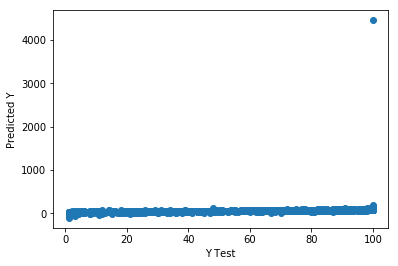

In [51]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

<b>6.7. Avaliando o modelo</b>

/home/angelo/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


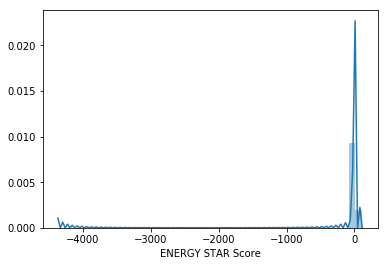

In [52]:
sns.distplot((y_test-predictions),bins=50)

<b>6.8. Impressão das métricas</b>

In [53]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_test, predictions))

MAE : 15.327389042271017


<b>7. Preparar resposta ao Kaggle</b>

<b>7.1. Importar arquivo de teste</b>

In [54]:
arq_teste = pd.read_csv('dataset_teste.csv')

<b>7.2. Visualizar dados do arquivo de teste e identificar eventuais necessidades de tratamento</b>

In [55]:
arq_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 59 columns):
OrderId                                                       2839 non-null int64
Property Id                                                   2839 non-null int64
Property Name                                                 2839 non-null object
Parent Property Id                                            2839 non-null object
Parent Property Name                                          2839 non-null object
BBL - 10 digits                                               2837 non-null object
NYC Borough, Block and Lot (BBL) self-reported                2839 non-null object
NYC Building Identification Number (BIN)                      2839 non-null object
Address 1 (self-reported)                                     2839 non-null object
Address 2                                                     2839 non-null object
Postal Code                                                   283

<b>7.3. Excluir as mesmas colunas do arquivo de teste</b>

In [56]:
# Antes de excluir, armazenar os valores de Property Id
proprietarios = arq_teste['Property Id'].tolist()

In [57]:
arq_teste.drop(['OrderId', 'BBL - 10 digits', 'Property Name', 'NYC Borough, Block and Lot (BBL) self-reported', 
              'Street Number', 'Street Name', 'Borough', 'Largest Property Use Type', 
              '2nd Largest Property Use Type', 'Address 1 (self-reported)', 'Address 2', 'Postal Code', 
              'Release Date', 'Parent Property Name', '3rd Largest Property Use Type', 'Latitude', 'Longitude',
              'Parent Property Id', 'NYC Building Identification Number (BIN)', 'NTA', 'Property Id',
              'List of All Property Use Types at Property'], 
             axis = 1, inplace = True)

<b>7.4. Identificar a presença de valores NA</b>

In [58]:
arq_teste.isna().sum()

DOF Gross Floor Area                                           16
Primary Property Type - Self Selected                           0
Largest Property Use Type - Gross Floor Area (ft²)              0
2nd Largest Property Use - Gross Floor Area (ft²)               0
3rd Largest Property Use Type - Gross Floor Area (ft²)          0
Year Built                                                      0
Number of Buildings - Self-reported                             0
Occupancy                                                       0
Metered Areas (Energy)                                          0
Metered Areas  (Water)                                          0
Site EUI (kBtu/ft²)                                             0
Weather Normalized Site EUI (kBtu/ft²)                          0
Weather Normalized Site Electricity Intensity (kWh/ft²)         0
Weather Normalized Site Natural Gas Intensity (therms/ft²)      0
Weather Normalized Source EUI (kBtu/ft²)                        0
Fuel Oil #

<b>7.5. Repetir os tratamentos dados no arquivo de treino ao arquivo de teste</b>

In [59]:
# Coluna DOF Gross Floor Area - Substituir valores por zero
arq_teste['DOF Gross Floor Area'].fillna((arq_teste['DOF Gross Floor Area'] == 0), inplace = True)

# Coluna Water Required - Substituir NA por Yes
arq_teste['Water Required?'].fillna('Yes', inplace = True)

# Substituir Yes por 1 e No por zero em Water Required?
arq_teste['Water Required?'].replace(
    to_replace = ['Yes'],
    value = 1,
    inplace = True)

arq_teste['Water Required?'].replace(
    to_replace = ['No'],
    value = 0,
    inplace = True)

# Substituir o termo 'In Compliance' por 1 e demais por zero
arq_teste['DOF Benchmarking Submission Status'] = arq_teste['DOF Benchmarking Submission Status'].map({'In Compliance': 1, 'nan': 0})
# Substituir NA por zero
arq_teste['DOF Benchmarking Submission Status'].fillna(0, inplace = True)

# Documentação não apresentou o conceito de Community Board, Council District, Census Tract e NTA
# Como Community Board, Council District, Census Tract são numéricos, substituir por zero
arq_teste['Community Board'].fillna(0, inplace = True)
arq_teste['Council District'].fillna(0, inplace = True)
arq_teste['Census Tract'].fillna(0, inplace = True)

In [60]:
# Criar variáveis dummies com Primary Property Type - Self Selected
cat_feats = ['Primary Property Type - Self Selected']
arq_teste2 = pd.get_dummies(arq_teste, columns = cat_feats, drop_first = True)

In [61]:
arq_teste2['2nd Largest Property Use - Gross Floor Area (ft²)'] = arquivo['2nd Largest Property Use - Gross Floor Area (ft²)'].convert_objects(convert_numeric=True)
arq_teste2['3rd Largest Property Use Type - Gross Floor Area (ft²)'] = arquivo['3rd Largest Property Use Type - Gross Floor Area (ft²)'].convert_objects(convert_numeric=True)
arq_teste2['Weather Normalized Site EUI (kBtu/ft²)'] = arquivo['Weather Normalized Site EUI (kBtu/ft²)'].convert_objects(convert_numeric=True)
arq_teste2['Weather Normalized Site Electricity Intensity (kWh/ft²)'] = arquivo['Weather Normalized Site Electricity Intensity (kWh/ft²)'].convert_objects(convert_numeric=True)
arq_teste2['Weather Normalized Site Natural Gas Intensity (therms/ft²)'] = arquivo['Weather Normalized Site Natural Gas Intensity (therms/ft²)'].convert_objects(convert_numeric=True)
arq_teste2['Weather Normalized Source EUI (kBtu/ft²)'] = arquivo['Weather Normalized Source EUI (kBtu/ft²)'].convert_objects(convert_numeric=True)
arq_teste2['Fuel Oil #1 Use (kBtu)'] = arquivo['Fuel Oil #1 Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Fuel Oil #2 Use (kBtu)'] = arquivo['Fuel Oil #2 Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Fuel Oil #4 Use (kBtu)'] = arquivo['Fuel Oil #4 Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Fuel Oil #5 & 6 Use (kBtu)'] = arquivo['Fuel Oil #5 & 6 Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Diesel #2 Use (kBtu)'] = arquivo['Diesel #2 Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['District Steam Use (kBtu)'] = arquivo['District Steam Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Natural Gas Use (kBtu)'] = arquivo['Natural Gas Use (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Weather Normalized Site Natural Gas Use (therms)'] = arquivo['Weather Normalized Site Natural Gas Use (therms)'].convert_objects(convert_numeric=True)
arq_teste2['Electricity Use - Grid Purchase (kBtu)'] = arquivo['Electricity Use - Grid Purchase (kBtu)'].convert_objects(convert_numeric=True)
arq_teste2['Weather Normalized Site Electricity (kWh)'] = arquivo['Weather Normalized Site Electricity (kWh)'].convert_objects(convert_numeric=True)
arq_teste2['Total GHG Emissions (Metric Tons CO2e)'] = arquivo['Total GHG Emissions (Metric Tons CO2e)'].convert_objects(convert_numeric=True)
arq_teste2['Direct GHG Emissions (Metric Tons CO2e)'] = arquivo['Direct GHG Emissions (Metric Tons CO2e)'].convert_objects(convert_numeric=True)
arq_teste2['Indirect GHG Emissions (Metric Tons CO2e)'] = arquivo['Indirect GHG Emissions (Metric Tons CO2e)'].convert_objects(convert_numeric=True)
arq_teste2['Water Use (All Water Sources) (kgal)'] = arquivo['Water Use (All Water Sources) (kgal)'].convert_objects(convert_numeric=True)
arq_teste2['Water Intensity (All Water Sources) (gal/ft²)'] = arquivo['Water Intensity (All Water Sources) (gal/ft²)'].convert_objects(convert_numeric=True)
arq_teste2['DOF Gross Floor Area'] = arquivo['DOF Gross Floor Area'].convert_objects(convert_numeric=True)
arq_teste2['Metered Areas (Energy)'] = arquivo['Metered Areas (Energy)'].convert_objects(convert_numeric=True)
arq_teste2['Metered Areas  (Water)'] = arquivo['Metered Areas  (Water)'].convert_objects(convert_numeric=True)

/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
/home/angelo/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use Series.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate f

<b>7.6. Incluir variáveis não presentes em treino</b>

In [62]:
arq_teste2['Primary Property Type - Self Selected_Courthouse'] = 0
arq_teste2['Primary Property Type - Self Selected_Manufacturing/Industrial Plant'] = 0
arq_teste2['Primary Property Type - Self Selected_Wholesale Club/Supercenter'] = 0
arq_teste2['Primary Property Type - Self Selected_College/University '] = 0
arq_teste2['Primary Property Type - Self Selected_Residential Care Facility'] = 0

In [63]:
# Checar resultado
arq_teste2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2839 entries, 0 to 2838
Data columns (total 60 columns):
DOF Gross Floor Area                                                           2839 non-null float64
Largest Property Use Type - Gross Floor Area (ft²)                             2839 non-null float64
2nd Largest Property Use - Gross Floor Area (ft²)                              2839 non-null float64
3rd Largest Property Use Type - Gross Floor Area (ft²)                         2839 non-null float64
Year Built                                                                     2839 non-null int64
Number of Buildings - Self-reported                                            2839 non-null int64
Occupancy                                                                      2839 non-null int64
Metered Areas (Energy)                                                         2839 non-null int64
Metered Areas  (Water)                                                         2839 non-null 

<b>7.6. Fazendo as previsões</b>

In [64]:
predict_arq_teste2 = lm.predict(arq_teste2)

In [65]:
# Armazenar o resultado em dataframe:
nome_colunas = ['Property Id', 'score']

In [70]:
resposta = pd.DataFrame(columns = nome_colunas)

In [71]:
resposta['Property Id'] = proprietarios

In [78]:
resposta['score'] = predict_arq_teste2

<b>7.7. Armazenar o dataframe em arquivo csv</b>

In [77]:
resposta.to_csv('resposta1.csv', index=False)

In [79]:
resposta.describe()

,Property Id,score
count,2.839000e+03,2839.000000
mean,3.655341e+06,91.188658
std,1.049141e+06,88.478799
min,8.841000e+03,-125.247330
25%,2.772414e+06,76.915961
50%,3.296567e+06,96.668096
75%,4.409065e+06,109.653333
max,5.991312e+06,4443.307353
